**RESEARCH QUESTION**

I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected in a year, July 2012 and July 2013. Later onwards, create models that would allow the company to accurately predict the house prices upon being provided with the predictor variables.

**METRIC FOR SUCCESS**
1. Import Data.
2. Perform data wrangling.
3. Perform exploratory data analysis.
4. Model development.
5. Refine and evaluate the model.



**1.0 Importing the Data**

In [28]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"L:/EA Foods\boston_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1**

In [10]:
#Checking the data types for each column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**2.0 Data Wrangling**

**Question 2**

In [12]:
# Dropping the irrelevant columns
df.drop(['id'],axis= 1, inplace= True)

In [16]:
# Obtaining statistical summary of the data
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
# Checking the null values 
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There were no null values in the dataset as displayed aboved. However, there are columns that are filled with 0 instead of the correct respective value of the column e.g Year renovated there were records with 0.

**3.0 Exploratory Data Analysis**

**Question 3**

In [26]:
# Counting houses with unique floor values
unique_floors = df['floors'].value_counts()
unique_floors

# Converting to a dataframe
unique_floors_df = unique_floors.to_frame()

**Question 4**

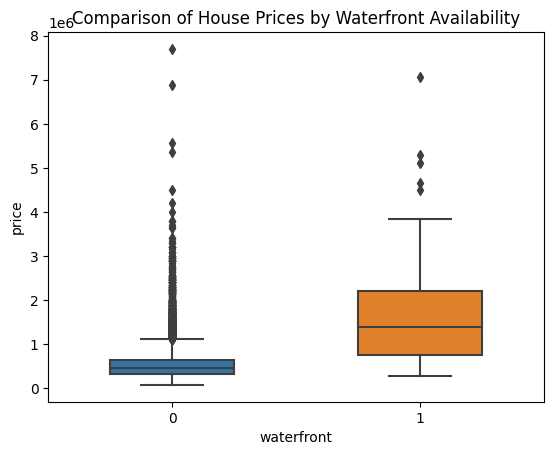

In [63]:
# Creating a boxplot
sns.boxplot(x='waterfront', y='price', data=df, width=0.5)
plt.title('Comparison of House Prices by Waterfront Availability')
plt.show()

- Houses located on waterfronts typically have higher prices than those without waterfront access, as depicted in the image above.
- Waterfront properties generally have a higher distribution of prices compared to non-waterfront properties.
- The median price for waterfront houses is approximately $1,500,000 whereas for non-waterfront houses it is approximately $450,000.
- Non-waterfront houses have a larger number of outliers, indicating the presence of properties with extremely high or low prices.


**Question 5**

Text(0.5, 1.0, 'Price vs Sqft Above Ground')

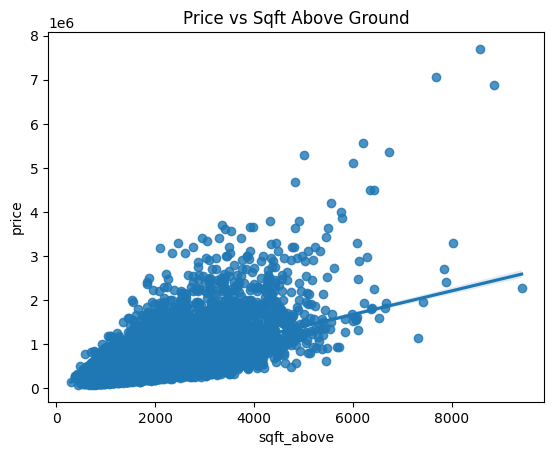

In [32]:
# Creating a scatter plot with regression line.
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs Sqft Above Ground')

- From the image above, there is a positive correlation between square footage above ground and the house price. As the square footage above ground increaseases, the prices increase as well.
- There are outliers as well representing houses with unusually high prices based on their square foorage above ground.

**Module 4: Model Development**

In [48]:
# Importing the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

**Question 6**

In [45]:
# Predicting housse price using sqft living in a linear regression model
#Getting the variables
y = df['price']
X = df[['sqft_living']]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Creating and fitting linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred = linear_model.predict(X_test)

# Calculating R^2
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2): {r2:.4f}")

R-squared (R2): 0.4941


- The R-squared above means that approximately 49.41% of the house prices can be explained by the variable square footage of the home.

**Question 7**

In [47]:
# Predicting housse price using sqft living in a linear regression model
#Getting the variables
y = df['price']
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view"
,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Creating and fitting linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred = linear_model.predict(X_test)

# Calculating R^2
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): 0.6615


- The R-Square has increased to 66.15% when the other addittional features were considered meaning that 66.15% of house prices can be explained by the features/variables selected.

**Question 8**

In [51]:
# Creating a list of tuples
estimators = [('scale',StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('model', LinearRegression())
              ]

pipeline = Pipeline(estimators)

# Fitting the pipeline to the data
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view"
,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X= df[features]
y= df['price']
pipeline.fit(X,y)

# Predicting the house prices
y_pred = pipeline.predict(X)

# Calculating R^2
r2 = r2_score(y, y_pred)
print(f"R-squared (R2): {r2:.4f}")

R-squared (R2): 0.7501


**Module 5: MODEL EVALUATION AND REFINEMENT**

In [55]:
# importing the required libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

**Question 9**

In [56]:
# Using the given features and price to create the model
X = df[features]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Ridge regression model
alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Predicting on test data
y_pred = ridge_model.predict(X_test)

#Calculating R^2
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R^2) for Ridge regression: {r2:.4f}")

R-squared (R^2) for Ridge regression: 0.6615


**Question 10**

In [58]:
# Setting the features
X = df[features]
y = df['price']

#  Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating polynomial features
poly_f = PolynomialFeatures(degree=2)
X_train_poly = poly_f.fit_transform(X_train)
X_test_poly = poly_f.transform(X_test)

# Creating and fitting the Ridge Regression model
alpha = 0.1
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_poly, y_train)

# Predicting
y_pred = ridge_model.predict(X_test_poly)

# Calculating R^2
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) for Ridge regression with polynomial features: {r2:.4f}")

R-squared (R²) for Ridge regression with polynomial features: 0.7003
